# Classification basics

Here we will focus on **Classification** problems - which means:
- **supervised** learning (with labeled data)
- with **categorical data** (as opposed to Regression problems which work on quantitative data)

___

# I. A Classification Problem

Suppose you want to classify data points between 2 labels, e.g. predict a customer churn for Netflix. A churner is a customer who resigned his subscription.

Netflix already has a large database of users with past churners.

We would have what we call our **features X** for many customers, e.g.:
- The subscrition plan
- The number of profiles
- The number of watched movies in the past month
- The average number of watched movies per month in the past year
- The subscription date
- ...

And we would have **labels y**:
- The churn status of the customer, we here have **two classes**: True or False

This is a typical **binary classification** problem.

We would like to use machine learning to solve it efficiently.

## There are many ML classification models - with specificities

Suppose you want to classify data points between 2 labels, e.g. predict a customer churn.

There are various Machine Learning **models**. They all have differences and may output different prediction.

Suppose we visualize all emails as points on a 2D charts : they will all draw different separation boundaries.

<img src="https://cdn-images-1.medium.com/max/2000/1*M6djHnMzmTu4c0CN58Dxpg.png" width="900px" align="center"/>

Let's explore one of the most classical ML classification models: the **logistic Regression**

# II. Logistic Regression

How does the logistic regression works?

Just like a linear regression, it will apply a **parameter $\theta$** to each feature X as a weighted sum (or a scalar product). Those parameters $\theta$ can be seen as the **weights** of each feature $i$:
$$
\theta \cdot X = \sum \theta_i \times x_i
$$

Then the **logistic function** (a.k.a. sigmoid) is applied, such as:
$$
h_{\theta}(x) = \frac{1}{1+exp(-\theta X)}
$$

Just to give an idea, the logisitic function looks like that:
![](images/logistic_curve.png)

As a consequence, the values of $h(x)$ are between 0 and 1. Even better, it can be interpreted as a probability.

We will then apply a threshold to predict a class $\hat{y}$ (churner or not churner):

$$
\hat{y} = 1 \text{ if } h_{\theta}(x) > 0.5 \text{ (i.e. Churner)}
$$

$$
\hat{y} = 0 \text{ otherwise (i.e. Not churner)}
$$

This allows to predict a class $\hat{y}$ with a given set of features X.

But how to find the right parameters $\theta$ that allow the right prediction?

## Cross entropy loss

How to train a logistic regression?

Meaning, how to find the parameters $\theta$ that give the best prediction?

First, we have to define a **loss** $\mathcal{L}$ to minimize.

The loss is also called error, or cost function depending on the context.

The most usual loss for binary classification is the **binary cross entropy**:

$$
\mathcal{L} = - y\,\log(h_{\theta}(x))\,-\,(1-y)\log (1 - h_{\theta}(x))
$$

Basically, we can split it in 4 extreme cases:
- if y = 0 and $h_{\theta}(x) \simeq 0$ : $\mathcal{L} << 1$
- if y = 0 and $h_{\theta}(x) \simeq 1$ : $\mathcal{L} >> 1$
- if y = 1 and $h_{\theta}(x) \simeq 0$ : $\mathcal{L} >> 1$
- if y = 1 and $h_{\theta}(x) \simeq 1$ : $\mathcal{L} << 1$

![](images/BCE.jpg)

Thus, minimizing this loss function will ensure a good classification.

In real life, we have not one, but many **samples** (a.k.a. **observations**), meaning our loss will actually be written as:
$$
\mathcal{L} = -\frac{1}{m} \sum_{i=1}^m y^{(i)}\,\log(h(x^{(i)}))\,+\,(1-y^{(i)})\log (1 - h(x^{(i)}))
$$

Where $^{(i)}$ is just a sample: in our **customer churn example, a sample is just a customer** in our database.

And $m$ is the number of samples, so the number of customers we would have in our database.

## Gradient descent

Finally, we want to find the $\theta$ parameters that minimize our loss:

$$
\displaystyle \min_{\theta} \mathcal{L} = \min_{\theta}-\frac{1}{m} \sum_{i=1}^m y^{(i)}\,\log(h(x^{(i)}))\,+\,(1-y^{(i)})\log (1 - h(x^{(i)}))
$$

A visual representation would be to try to go down a valley, the valley being our loss function:

<p align="center">
  <img src="https://drive.google.com/uc?export=view&id=1Q0NwocOMQUKV2uOl08bRAZupMfaD8y6V">
</p>

> How would find those optimal parameters $\theta$ that minimize our loss?

We can do it iteratively:

Imagine you are in a mountain with heavy fog around you. How can you try to get to the bottom of the valley?

Just look around you at each step and **go each step in the direction that makes you go down the most**.

Here we can do the same:
- We observe around us which direction makes us go down the most
- We take a step towards this direction and update our model with the new parameters
- Then we iterate until convergence or max iteration

<p align="center">
  <img src="https://drive.google.com/uc?export=view&id=1KW7E9OIDoHYTxrsuTso7Vng0Eky_Q7Tg">
</p>

This is called the **Gradient Descent** algorithm.

Mathematically, this just means that we compute the partial derivative of the function for a given $\theta_i$:

$$
d\theta_i =\frac{\partial}{\partial\theta_i}\mathcal{L} = (y - h_{\theta}(x)) x_i
$$
This will show us the direction that goes down the most.

Then we update our model parameters:
$$
\displaystyle \theta_i = \theta_i - \alpha\frac{\partial}{\partial\theta_i}\mathcal{L} = \theta_i - \alpha d\theta_i
$$

Meaning, we take a step toward this direction and update our model accordingly.


The new parameter $\alpha$ is called the **learning rate**. The learning rate will control the size of the steps.

Finally, step by step, we eventually may reach the global minimum of our loss function.

# III. Multiclass Classification

The logistic regression allows to perform **binary classification**. This is useful for problems such as customer churn, or tumor detection. 

But what if we have more than 2 classes, e.g. predicting an email category among 3 classes:
- Spam
- Work
- Personal

How would you do that using logistic regression?

We can train three models, classifying the following:
- **model S**: Spam against Work and Personal
- **model W**: Work against Spam and Personal
- **model P**: Personal against Spam and Work

Then we would keep the highest score of the three models as the prediction.

For example:
- model S: $\hat{y}$ = 0.4
- model W: $\hat{y}$ = 0.2
- model P: $\hat{y}$ = 0.3

Then we would predict Personal email. This technical is called **One versus Rest** classification, sometimes just called OvR.

# IV. Example of Iris classification

Iris dataset is a very standard and famous dataset for training.

It has 4 features about flowers:
- Sepal length
- Sepal width
- Petal length
- Petal width

And 3 classes, types of flowers:
- Setosa
- Virginica
- Versicolor

So this is a **multiclass classification**.

![](images/iris_dataset.jpeg)

We first load the dataset:

In [1]:
from sklearn.datasets import load_iris
data = load_iris()
X = data['data']
y = data['target']
print('X features:', data['feature_names'])
print('y labels:', data['target_names'])

X features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
y labels: ['setosa' 'versicolor' 'virginica']


How many features and samples do we have?

In [2]:
X.shape

(150, 4)

> We have 150 samples and 4 features.

We can visualize the data if needed:

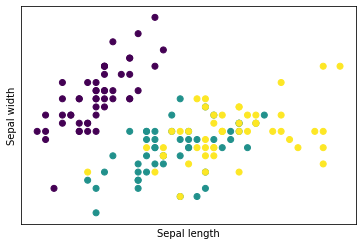

In [3]:
from matplotlib import pyplot as plt
# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y)
# Format chart
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xticks(())
plt.yticks(())
plt.show()

## Train a logistic regression model with scikit-learn

The logistic regression model is available in scikit-learn. 

Scikit-learn is probably the most widely used machine learning library at the moment. Most machine learning algorithms are available, well documented, and really easy to use.

The logistic regression model is available with the following signature:
```
sklearn.linear_model.LogisticRegression
```

Then the code is always the same:
- Import the model: `from sklearn.linear_model import LogisticRegression`
- Instantiate a model, e.g.: `lr_model = LogisticRegression()`
- Fit the model on data, e.g.: `lr_model.fit(X, y)`
- Predict, e.g.: `lr_model.predict(X)`

In [4]:
# We import and instantiate the model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

Then we fit the model to our data X and y with the `.fit(X, y)` method:

In [5]:
lr.fit(X, y)

/home/vince/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

We can then get predictions from our model with the `.predict(X)` method:

In [6]:
y_pred = lr.predict(X)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

And finally we can evaluate the **accuracy** of our model: this is just the number of good predictions over total number of predictions

In [7]:
accuracy = lr.score(X, y)

print("Logistic regression accuracy:", accuracy)

Logistic regression accuracy: 0.9733333333333334


___

# V. Other classification models

There exist many classification models. Here are some of the most frequently used and their scikit-learn class:
- k-NN: using k closest neighbors to define the class
> ```sklearn.neighbors.KNeighborsClassifier```
- Support Vector Machine (SVM): maximizing margin, can use kernel for non linearity
> ```sklearn.svm.SVC```
- Naive Bayes: based on Bayes theorem
> ```sklearn.naive_bayes.GaussianNB```

If I want, for example, to use k-NN, the code would be extremely similar to logistic regression:

In [8]:
# We import and instantiate the model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
# Fit the model
knn.fit(X, y)
# Evaluate the model
print('k-NN accuracy:', knn.score(X, y))

k-NN accuracy: 0.9666666666666667


___

In [ ]:
# Attach the dataset to the environment
data(iris)
# Rename the data
iris_dataset<-iris
# View the data
head(iris_dataset)

How many samples do we have?

In [ ]:
dim(iris_dataset)

We have 150 samples.

In [ ]:
library(ggplot2)
g <- ggplot(data=iris_dataset, aes(x = Petal.Length, y = Petal.Width))
g <-g + 
    geom_point(aes(color=Species, shape=Species)) +
    xlab("Petal Length") +
    ylab("Petal Width") +
    ggtitle("Petal Length-Width")
print(g)

Let's **train our model** on the data:

In [ ]:
model <- glm(Species ~ Sepal.Length + Sepal.Width + Petal.Length + Petal.Width,
             data = iris_dataset,
             family = binomial)

Have a look at the model:

In [ ]:
model

In [ ]:
predict(model, type='response')

In [ ]:
glfit<-glm(y~x, family = 'binomial')